In [79]:
import tensorflow as tf

In [80]:
from tensorflow import keras

In [81]:
tf.__version__

'1.13.1'

In [82]:
keras.__version__

'2.2.4-tf'

In [83]:
df = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = df.load_data()

In [84]:
X_train_full.shape

(60000, 28, 28)

In [85]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [86]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [87]:
class_names[y_train[0]]

'Coat'

In [88]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Flatten


In [89]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu' ))
model.add(Dense(10,activation='softmax' ))
 

In [90]:
model.layers

In [91]:
model.layers[1].name

'dense_10'

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [93]:
w,b = model.layers[1].get_weights()
w

array([[-0.07364177,  0.04694547,  0.05638276, ...,  0.05037846,
         0.04013526, -0.04222182],
       [-0.03029143, -0.03243572,  0.05256674, ..., -0.00199618,
         0.00875333,  0.0326509 ],
       [ 0.06438825,  0.0502032 ,  0.01763015, ...,  0.05942422,
         0.05938154,  0.0048148 ],
       ...,
       [ 0.0064126 ,  0.01227007, -0.03014756, ...,  0.03732029,
         0.06924309,  0.02343576],
       [-0.06792314,  0.01717871, -0.02546932, ...,  0.03009427,
         0.01215158,  0.06568553],
       [-0.07162537,  0.04689488,  0.02883977, ..., -0.06508088,
         0.06538925, -0.0305266 ]], dtype=float32)

In [94]:
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [95]:
h =model.fit(X_train,y_train,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
55000/55000 [==============================] - 7s 130us/step - loss: 0.7136 - acc: 0.7659
Epoch 2/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.4850 - acc: 0.8310 0s - loss: 0.48
Epoch 3/30
55000/55000 [==============================] - 6s 114us/step - loss: 0.4406 - acc: 0.8457
Epoch 4/30
55000/55000 [==============================] - 6s 115us/step - loss: 0.4136 - acc: 0.8556
Epoch 5/30
55000/55000 [==============================] - 7s 120us/step - loss: 0.3935 - acc: 0.8626
Epoch 6/30
55000/55000 [==============================] - 6s 116us/step - loss: 0.3785 - acc: 0.8675
Epoch 7/30
55000/55000 [==============================] - 7s 124us/step - loss: 0.3654 - acc: 0.8710
Epoch 8/30
55000/55000 [==============================] - 8s 136us/step - loss: 0.3545 - acc: 0.8746
Epoch 9/30
55000/55000 [==============================] - 7s 118us/step - loss: 0.3441 - acc: 0.8774
Epoch 10/30
55000/55000 [==

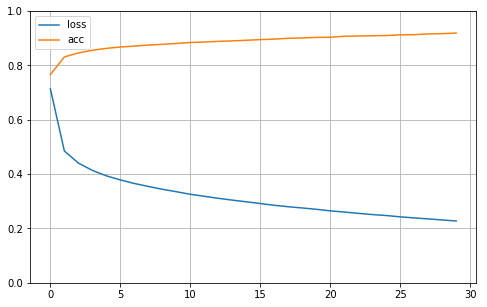

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [99]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 66us/step


[2.833497012519836, 0.8224]